In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd 'drive/'

/content/drive


In [4]:
cd 'My Drive/'

/content/drive/My Drive


In [5]:
cd '9517Task100'

/content/drive/My Drive/9517Task100


In [6]:
ls

data/               padding_data.pyc  test_hard.py   Untitled.ipynb
data_generator.py   __pycache__/      train_hard.py  vessel_unet.hdf5
data_generator.pyc  Task111/          unet_model.py
padding_data.py     Task1_1117.ipynb  unetres/


In [7]:
!pip install gif2numpy

  Created wheel for gif2numpy: filename=gif2numpy-1.3-py2.py3-none-any.whl size=8387 sha256=9c40f1c36d52f0f1f63b00c7ebdfe2c54a4407e8a4c862a2160251c73e06c8a6
  Stored in directory: /root/.cache/pip/wheels/75/26/83/f9c9bda0654ff9788bae2d14fd074b61e1b72824a312103dfe
  Created wheel for kaitaistruct: filename=kaitaistruct-0.8-py2.py3-none-any.whl size=4924 sha256=0b83a7765c357aceaeafb22022bf0634ec0c1d08209c97dcc22f38a3a31a655f
  Stored in directory: /root/.cache/pip/wheels/13/96/bf/b0b85f189392528465d57eefa22848ca333703d585700b86e2
Successfully built gif2numpy kaitaistruct


In [0]:
!python "train_hard.py"

Using TensorFlow backend.
Start padding path= data/train/original_retinal_images/
Finished padding path= data/train/original_retinal_images/
Start padding path= data/train/masks_Hard_Exudates/
Finished padding path= data/train/masks_Hard_Exudates/






2019-11-18 01:40:13.232742: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2019-11-18 01:40:13.232987: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1516a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2019-11-18 01:40:13.233020: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2019-11-18 01:40:13.237997: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-11-18 01:40:13.385782: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at le

In [8]:
from padding_data import padding_all
from data_generator import trainGenerator, testGenerator
import numpy as np
from unet_model import set_model
from keras.callbacks import TensorBoard, ModelCheckpoint
import os
import cv2
import matplotlib.pyplot as plt
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, confusion_matrix

# orig_path = "data/test/original_retinal_images/"
# new_orig_path = "data/test/new_original_retinal_images/"

# hard_path = "data/test/masks_Hard_Exudates/"
# new_hard_path = "data/test/new_masks_Hard_Exudates/"

# #padding original img
# padding_all(orig_path,new_orig_path)
# # padding hard img
# padding_all(hard_path,new_hard_path)


test_image_path = "data/test/new_original_retinal_images/"
test_label_path = "data/test/new_masks_Hard_Exudates/"
img_size = (512,512)
img_shape = (512,512,1)

test_data = testGenerator(test_image_path,test_label_path,img_size,img_shape)
print("[TEST INFO]: Finished generating test data")
# get the test data
test_image = np.asarray(test_data[0])
test_label = np.asarray(test_data[1])

Using TensorFlow backend.


['01_test.tif', 'IDRiD_55.jpg', 'IDRiD_56.jpg', 'IDRiD_57.jpg', 'IDRiD_58.jpg', 'IDRiD_59.jpg']
['IDRiD_55_EX.tif', 'IDRiD_56_EX.tif', 'IDRiD_57_EX.tif', 'IDRiD_58_EX.tif', 'IDRiD_59_EX.tif', 'IDRiD_60_EX.tif', 'IDRiD_61_EX.tif', 'IDRiD_62_EX.tif', 'IDRiD_63_EX.tif', 'IDRiD_64_EX.tif', 'IDRiD_65_EX.tif', 'IDRiD_66_EX.tif', 'IDRiD_67_EX.tif', 'IDRiD_68_EX.tif', 'IDRiD_69_EX.tif', 'IDRiD_70_EX.tif', 'IDRiD_71_EX.tif', 'IDRiD_72_EX.tif', 'IDRiD_73_EX.tif', 'IDRiD_74_EX.tif', 'IDRiD_75_EX.tif', 'IDRiD_76_EX.tif', 'IDRiD_77_EX.tif', 'IDRiD_78_EX.tif', 'IDRiD_79_EX.tif', 'IDRiD_80_EX.tif', 'IDRiD_81_EX.tif']
Finsihed Loading Test Data
[TEST INFO]: Finished generating test data


In [9]:



#############################################################
##### This is the first model
#############################################################
model = set_model()
# identify the training result and load it
if os.path.isfile('vessel_unet.hdf5'):
    print("[TEST INFO]: Loading the training result")
    model.load_weights('vessel_unet.hdf5')
model_checkpoint = ModelCheckpoint('vessel_unet.hdf5', monitor='val_acc', verbose=1, save_best_only=True)
print("[TEST INFO]: Finished Loading")
###################################################################################################

y_pred = model.predict(test_image)

y_pred_threshold = []













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/content/drive/My Drive/9517Task100/unet_model.py:146: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`
  model = Model(input=inputs, output=output_layer)


[TEST INFO]: Loading the training result
[TEST INFO]: Finished Loading


(array([5.22420e+04, 1.33910e+04, 1.79711e+05, 1.56570e+04, 1.15000e+02,
        5.50000e+01, 3.26000e+02, 5.94000e+02, 4.20000e+01, 1.10000e+01]),
 array([1.3113022e-06, 1.8462539e-05, 3.5613775e-05, 5.2765012e-05,
        6.9916248e-05, 8.7067485e-05, 1.0421872e-04, 1.2136996e-04,
        1.3852119e-04, 1.5567243e-04, 1.7282367e-04], dtype=float32),
 <a list of 10 Patch objects>)

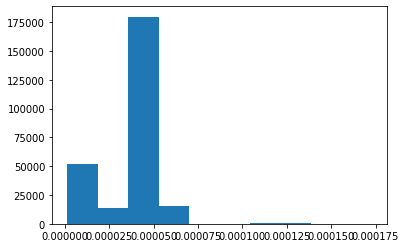

In [10]:
y_pred[0]
plt.hist( (y_pred[0]).flatten())

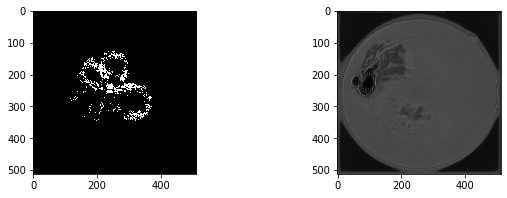

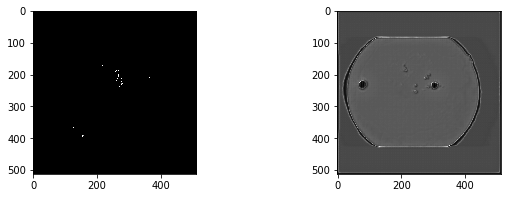

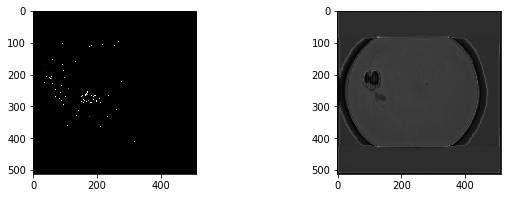

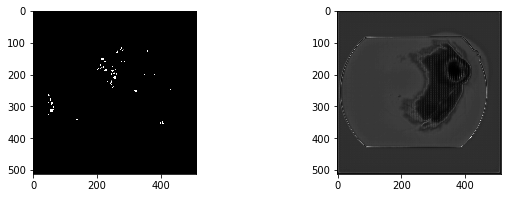

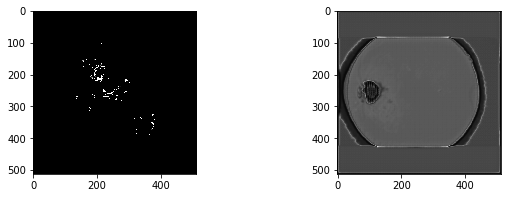

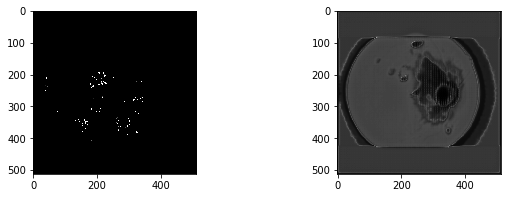

In [15]:
i = 0
#result_path = "data/test/result_hard/"
for y in y_pred:
    _, temp = cv2.threshold(y, 0.0025, 1, cv2.THRESH_BINARY)
    y_pred_threshold.append(temp)
    #filename = f"{result_path}{i}.jpg"
    #cv2.imwrite(filename, temp) 
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    # axes[0].imshow(img)

    axes[0].imshow(np.reshape(test_label[i], img_size),cmap="gray")

    axes[1].imshow(np.reshape(y*255 , img_size),cmap="gray")
    i += 1